###Μηχανική Μάθηση
####1η ατομική εργασία
ΣΗΜΜΥ- ΕΜΠ -Ακ. Έτος 2023-24



# ⚠️
`Επισημαίνεται ότι απαγορεύεται η ανάρτηση των λύσεων των εργαστηριακών ασκήσεων στο github, ή σε άλλες ιστοσελίδες. Η σχεδίαση και το περιεχόμενο των εργαστηριακών projects αποτελούν αντικείμενο πνευματικής ιδιοκτησίας της διδακτικής ομάδας του μαθήματος.`

 `⚠️  Το σύνολο δεδομένων που σας δόθηκε δεν πρέπει να εμπλουτισθεί με οποιοδήποτε τρόπο. Η εργασία στην οποία θα χρησιμοποιηθεί εμπλουτισμένο σύνολο δεδομένων, δεν θα διορθωθεί.`

Ονοματεπώνυμο φοιτητή:Παύλος Σκούρτης

Α.Μ.:03120052

### 1. Εισαγωγή συνόλου δεδομένων

Tο σύνολο δεδομένων για το training-validation μπορείτε να το κατεβάσετε από [εδώ](https://drive.google.com/file/d/1_ndkaT6BoDuxxPPxLWq-oKDJqzO1Dlhg/view?usp=sharing) .


1.α. Φορτώστε το σύνολο δεδομένων "train-val.csv"  στο notebook σας.

In [32]:
import pandas as pd
file_path = "/content/train-val (1).csv"
# Load the CSV file into a DataFrame
data = pd.read_csv(file_path,header=0)

### 2. Διερευνητική ανάλυση δεδομένων -Exploratory Data Analysis (EDA)
Χρησιμοποιήστε code cells  με τις κατάλληλες τεχνικές EDA για την κατανόηση του συνόλου δεδομένων και text cells για επεξήγηση των αποτελεσμάτων.

Χρησιμοποιώντας τις κατάλληλες μεθόδους παρουσιάστε με χρήση κώδικα πληροφορίες για τα εξής:

2α. το πλήθος των δειγμάτων και των χαρακτηριστικών του συνόλου δεδομένων,

2β. το είδος των χαρακτηριστικών του συνόλου δεδομένων,  

2γ. τις ετικέτες των χαρακτηριστικών,

2δ. το πλήθος των κατηγοριών,

2ε. πόσα δείγματα ανήκουν σε κάθε κατηγορία,

2στ. τη συσχέτιση μεταξύ των δεδομένων,

2ζ. οποιαδήποτε άλλη πληροφορία πιστεύετε ότι είναι χρήσιμη για την κατανόηση του συνόλου δεδομένων.

In [33]:
#2a
rows, columns = data.shape
print("Number of samples (rows):", rows)
print("Number of characteristics (columns):", columns)
#2b
data_types = data.dtypes
print("Data types of characteristics:", data_types)
#2c
attribute_labels = data.columns
print("Attribute labels:", attribute_labels)
#2d
num_categories = data.nunique()
print("Number of categories in each column:",num_categories)
#2e
for column_name in data.columns:
    category_counts = data[column_name].value_counts()
    print(f"Number of samples for each category in column '{column_name}':",category_counts)
#2f
correlation_matrix = data.corr()
print("Correlation Matrix:",correlation_matrix)

Number of samples (rows): 48423
Number of characteristics (columns): 24
Data types of characteristics: id                 int64
Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday        float64
RainTomorrow     float64
dtype: object
Attribute labels: Index(['id', 'Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall',
       'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am',
       'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm'

<ipython-input-33-3b3db6fec886>:19: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


### 3. Προεπεξεργασία συνόλου δεδομένων
💡`Χρησιμοποιήστε το Column Transformer για τη δημιουργία και την εφαρμογή χωριστών μετασχηματιστών για αριθμητικά και κατηγορικά δεδομένα.`




3.α.  Θα χρησιμοποιήσετε όλα τα χαρακτηριστικά του συνόλου δεδομένων για την εκπαίδευση των ταξινομητών ή θα επιλέξετε κάποια από αυτά;  Θα κάνετε κάποια συνένωση κάποιων χαρακτηριστικών για δημιουργία νέων χαρακτηριστικών για το μοντέλο σας;


In [34]:
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data = data.drop(columns=['Date'])

#didnt drop values with high correlation because it had worst score

data = data.drop(columns=['id'])


3.β. Υπάρχουν απουσιάζουσες τιμές; Γράψτε κατάλληλο κώδικα ώστε να χειριστείτε αυτές τις τιμές.

In [35]:
missing_values = data.isnull().sum()
print("Columns with missing values:",missing_values[missing_values > 0])
# Set a threshold for the percentage of missing values
missing_threshold = 0.4

# Calculate the percentage of missing values for each column
missing_values_percentage = (missing_values / len(data))

# Identify columns with missing values exceeding the threshold
columns_to_drop = missing_values_percentage[missing_values_percentage > missing_threshold].index

# Print columns to be dropped
print("Columns to be dropped due to many missing values:", columns_to_drop)

# Drop columns with many missing values
data.drop(columns=columns_to_drop, inplace=True)

print("Columns with missing values:",missing_values[missing_values > 0])
data.fillna(data.mean(), inplace=True)
categorical_columns = ['WindGustDir', 'WindDir9am', 'WindDir3pm']
for column in categorical_columns:
    most_frequent_value = data[column].mode()[0]
    data[column].fillna(most_frequent_value, inplace=True)
updated_missing_values = data.isnull().sum()
print("\nColumns with missing values after handling:",updated_missing_values[updated_missing_values > 0])

Columns with missing values: MinTemp            160
MaxTemp            101
Evaporation      20384
Sunshine         22997
WindGustDir       3121
WindGustSpeed     3093
WindDir9am        3821
WindDir3pm        1328
WindSpeed9am       357
WindSpeed3pm       857
Humidity9am        558
Humidity3pm       1259
Pressure9am       4780
Pressure3pm       4789
Cloud9am         17890
Cloud3pm         18981
Temp9am            226
Temp3pm            913
dtype: int64
Columns to be dropped due to many missing values: Index(['Evaporation', 'Sunshine'], dtype='object')
Columns with missing values: MinTemp            160
MaxTemp            101
Evaporation      20384
Sunshine         22997
WindGustDir       3121
WindGustSpeed     3093
WindDir9am        3821
WindDir3pm        1328
WindSpeed9am       357
WindSpeed3pm       857
Humidity9am        558
Humidity3pm       1259
Pressure9am       4780
Pressure3pm       4789
Cloud9am         17890
Cloud3pm         18981
Temp9am            226
Temp3pm            913


<ipython-input-35-38f71e5fb2e1>:19: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


3.γ. Γράψτε κώδικα για την κατάλληλη μετατροπή των κατηγορικών μεταβλητών ώστε να μπορούν να τους διαχειριστούν οι ταξινομητές που θα χρησιμοποιήσετε.

In [36]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
X = data.drop(columns=['RainTomorrow'])
y = data['RainTomorrow']
numeric_features = X.select_dtypes(include=['float64','int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])




3.δ. Γράψτε κώδικα για την κλιμάκωση των χαρακτηριστικών, αν την θεωρείτε απαραίτητη

3.ε. Εκτελέστε όλα τα προηγούμενα βήμα προεκπαίδευσης (χρήση μετασχηματιστών) ώστε να είναι "καθαρό" το αρχικό σύνολο για να χρησιμοποιηθεί για την εκπαίδευση των ταξινομητών.

3.στ. Αφού έχετε "καθαρίσει" το αρχικό σύνολο εκπαίδευσης, γράψτε τον κατάλληλο κώδικα ώστε από το αρχικό σύνολο εκπαίδευσης να δημιουργήσετε τα σύνολα Χ και y.

💡 `Η στήλη 'RainTomorrow' είναι η τιμή που θέλουμε να προβλέψει ο ταξινομητής μας.`



3.ζ. Διαχωρίστε το σύνολο δεδομένων σε σύνολο εκπαίδευσης (train set) και σε σύνολο επικύρωσης (validation set) (ο διαχωρισμός να είναι train set 70% και validation set 30%).


In [37]:
from sklearn.model_selection import train_test_split
preprocessor.fit(X)
X1=preprocessor.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=42)
X_dense_train = X_train.toarray()
X_dense_test = X_test.toarray()

### 4. Εκπαίδευση μοντέλου με default τιμές στις παραμέτρους των ταξινομητών

Θα εκπαιδεύσουμε τους ακόλουθους ταξινομητές με το σύνολο εκπαίδευσης των δεδομένων μας:
1. Naive Bayes
2. KNeighborsClassifier
3. LogisticRegression
4. MLP με ένα κρυφό επίπεδο
5. SVC
6. Decision Tree
7. Random Forest


In [38]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
GNB = GaussianNB()
KNN = KNeighborsClassifier()
LR = LogisticRegression()
MLP = MLPClassifier()
SVC = SVC()
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()



 4.α. Εκπαιδεύστε (fit)  και τους  7 ταξινομητές που προαναφέρθηκαν (εμφανίστε τα δείγματα από το train set μαζί με την ετικέτα τους στην είσοδο του κάθε ταξινομητή), χρησιμοποιώντας τις default τιμές για όλες τις παραμέτρους τους.

In [39]:
#GaussianNB
GNB.fit(X_dense_train,y_train)

#KNeighborsClassifier
KNN.fit(X_dense_train,y_train)

#LogisticRegression
LR.fit(X_dense_train,y_train)

#MLPClassifier
MLP.fit(X_dense_train,y_train)

#SVC
SVC.fit(X_dense_train,y_train)

#DecisionTreeClassifier
DT.fit(X_dense_train,y_train)

#RandomForestClassifier
RF.fit(X_dense_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


RandomForestClassifier()

4.β. Εφαρμόστε στα εκπαιδευμένα μοντέλα από το validation set μόνο τα δείγματα χωρίς την ετικέτα τους (predict).


In [40]:
#GaussianNB
GNB_pred = GNB.predict(X_dense_test)

#KNeighborsClassifier
KNN_pred = KNN.predict(X_dense_test)

#LogisticRegression
LR_pred = LR.predict(X_dense_test)

#MLPClassifier
MLP_pred = MLP.predict(X_dense_test)

#SVC
SVC_pred = SVC.predict(X_dense_test)

#DecisionTreeClassifier
DT_pred = DT.predict(X_dense_test)

#RandomForestClassifier
RF_pred = RF.predict(X_dense_test)


4.γ. Συγκρίνετε την έξοδο του κάθε μοντέλου σε σχέση με τις αντίστοιχες ετικέτες του validation set και αξιολογήστε την επιδοσή τους χρησιμοποιώντας το F1 score.


In [41]:
from sklearn.metrics import f1_score


# Evaluate F1 scores for each model
f1_GNB = f1_score(y_test, GNB_pred)
f1_KNN = f1_score(y_test, KNN_pred)
f1_LR = f1_score(y_test, LR_pred)
f1_MLP = f1_score(y_test, MLP_pred)
f1_SVC = f1_score(y_test, SVC_pred)
f1_DT = f1_score(y_test, DT_pred)
f1_RF = f1_score(y_test, RF_pred)

# Print the F1 scores
print("F1 Score for GNB:", f1_GNB)
print("F1 Score for KNN:", f1_KNN)
print("F1 Score for LR:", f1_LR)
print("F1 Score for MLP:", f1_MLP)
print("F1 Score for SVC:", f1_SVC)
print("F1 Score for DT:", f1_DT)
print("F1 Score for RF:", f1_RF)

F1 Score for GNB: 0.46812749003984067
F1 Score for KNN: 0.5742160278745644
F1 Score for LR: 0.6241750607849947
F1 Score for MLP: 0.6276708592210941
F1 Score for SVC: 0.6382902938557435
F1 Score for DT: 0.5467392904460474
F1 Score for RF: 0.6126388635949737


4.δ.  Αξιολογήστε συνολικά την επίδοση των μοντέλων χρησιμοποιώντας κάποιο γράφημα (π.χ. ιστόγραμμα, bar plot) και σχολιάστε ποιο μοντέλο είχε την καλύτερη επίδοση.


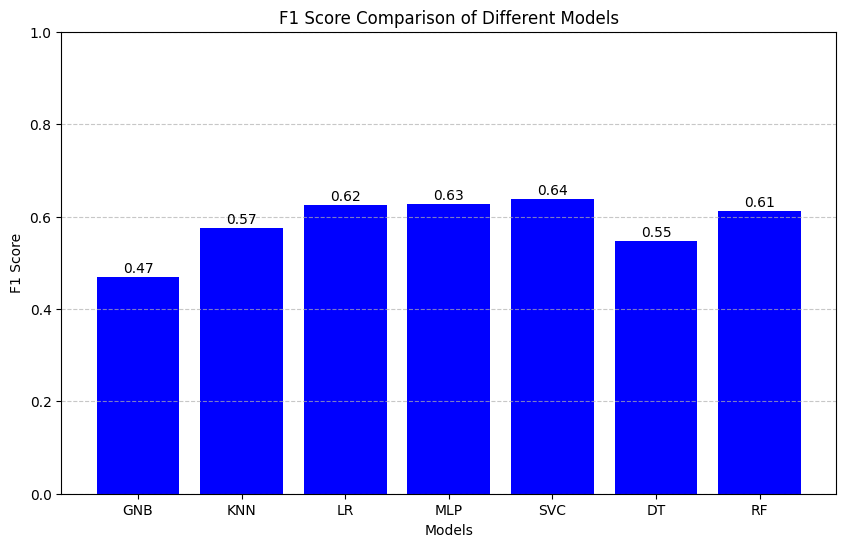

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# F1 scores for each model
f1_scores = [f1_GNB, f1_KNN, f1_LR, f1_MLP, f1_SVC, f1_DT, f1_RF]

# Model names
models = ['GNB', 'KNN', 'LR', 'MLP', 'SVC', 'DT', 'RF']

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, f1_scores, color='blue')
plt.title('F1 Score Comparison of Different Models')
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.ylim(0, 1)  # Set the y-axis limit to better visualize differences

plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, score in enumerate(f1_scores):
    plt.text(i, score + 0.01, f'{score:.2f}', ha='center')

plt.show()

### 5. Προετοιμασία αρχείου για την πρώτη υποβολή στο kaggle

5.α. Χρησιμοποιήστε **ΜΟΝΟ** το μοντέλο σας με την καλύτερη επίδοση για να κάνετε προβλέψεις, χρησιμοποιώντας το [test set](https://drive.google.com/file/d/1bcmuoeRVY0y5ZuY6nZcmzy8_5fOFR4Oa/view?usp=drive_link).


In [43]:

import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

file_path = "/content/test.csv"
# Load the CSV file into a DataFrame
data1 = pd.read_csv(file_path,header=0)
data1['Date'] = pd.to_datetime(data1['Date'])

data1['Year'] = data1['Date'].dt.year
data1['Month'] = data1['Date'].dt.month
data1['Day'] = data1['Date'].dt.day

# Drop the original 'Date' column
data1 = data1.drop(columns=['Date'])


data1 = data1.drop(columns=['Evaporation', 'Sunshine'])
data1.fillna(data1.mean(), inplace=True)
categorical_columns = ['WindGustDir', 'WindDir9am', 'WindDir3pm']
for column in categorical_columns:
    most_frequent_value = data1[column].mode()[0]
    data1[column].fillna(most_frequent_value, inplace=True)
updated_missing_values = data1.isnull().sum()


numeric_features = data1.select_dtypes(include=['float64','int64']).columns
categorical_features = data1.select_dtypes(include=['object']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

preprocessor.fit(data1)
x_test_trans1 = preprocessor.transform(data1)
x_dense_test1 = x_test_trans1.toarray()

SVC_pred1 =SVC.predict(x_dense_test1)


<ipython-input-43-b5f689ddb9e6>:10: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data1['Date'] = pd.to_datetime(data1['Date'])
<ipython-input-43-b5f689ddb9e6>:21: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data1.fillna(data1.mean(), inplace=True)


5.β. Αποθηκεύστε τις προβλέψεις από το καλύτερο μοντέλο σας σε ένα csv αρχείο. To csv αρχείο θα πρέπει να είναι περιέχει 2 στήλες: η πρώτη στήλη να περιέχει την στήλη id του test set file και η δεύτερη στήλη τις αντίστοιχες προβλέψεις που έκανε το καλύτερα εκπαιδευμένο μοντέλο σας (βήμα 5α).

In [44]:
id_column = list(range(1, len(SVC_pred1) + 1))
predictions_df = pd.DataFrame({'id': id_column , 'predictions': SVC_pred1})

# Save the DataFrame to a CSV file
predictions_df.to_csv('best_model_predictions.csv', index=False)


### 6. Βελτιστοποίηση μοντέλων με εύρεση καλύτερων υπερπαραμέτρων των ταξινομητών

6.α. Για τους 7 ταξινομητές βελτιστοποιήστε την επίδοσή τους χρησιμοποιώντας αναζήτηση πλέγματος με διασταυρούμενη επικύρωση (k-fold 5)  με σκοπό την εύρεση των βέλτιστων υπερπαραμέτρων.

In [45]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score
from sklearn.svm import SVC


classifiers_parametered = [
    ('Naive Bayes', GaussianNB(), {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}),
    ('KNN', KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]}),
    ('Logistic Regression', LogisticRegression(max_iter=1000), {'C': [0.1, 1.0, 10.0]}),
    ('MLP', MLPClassifier(max_iter=500), {'hidden_layer_sizes': [(50,), (100,), (150,)]}),
    ('SVC', SVC(), {'kernel': ['linear', 'rbf'], 'C': [0.1, 1.0, 10.0]}),
    ('Decision Tree', DecisionTreeClassifier(), {'max_depth': [None, 10, 20]}),
    ('Random Forest', RandomForestClassifier(), {'n_estimators': [50, 100, 150]})
]

best_params = {}
best_model = {}

# Create a k-fold cross-validator
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the scorer
scorer = make_scorer(f1_score)
# Iterate through classifiers
for name, classifier, param_grid in classifiers_parametered:
    print(name)

    # Create GridSearchCV instance
    grid_search = GridSearchCV(classifier, param_grid, scoring=scorer, cv=cv, n_jobs=-1)

    # Fit the model
    grid_search.fit(X_dense_train,y_train)

    # Get the best parameters
    best_params[name] = grid_search.best_params_

    # Print results
    print(f"Best Parameters for {name}: {best_params[name]}")

Naive Bayes
Best Parameters for Naive Bayes: {'var_smoothing': 1e-05}
KNN
Best Parameters for KNN: {'n_neighbors': 5}
Logistic Regression
Best Parameters for Logistic Regression: {'C': 1.0}
MLP
Best Parameters for MLP: {'hidden_layer_sizes': (150,)}
SVC
Best Parameters for SVC: {'C': 10.0, 'kernel': 'rbf'}
Decision Tree
Best Parameters for Decision Tree: {'max_depth': 10}
Random Forest
Best Parameters for Random Forest: {'n_estimators': 150}


6.β. Εφαρμόστε στα εκπαιδευμένα μοντέλα από το validation set μόνο τα δείγματα χωρίς την ετικέτα τους (predict).


In [46]:
from sklearn.svm import SVC
predictions = {}
best_model = [
    ('Naive Bayes', GaussianNB(var_smoothing=1e-05)),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('Logistic Regression', LogisticRegression(C=1.0)),
    ('MLP', MLPClassifier(hidden_layer_sizes=(150,))),
    ('SVC', SVC(kernel='rbf',C=10.0)),
    ('Decision Tree', DecisionTreeClassifier(max_depth=10)),
    ('Random Forest', RandomForestClassifier(n_estimators=150))
]
# Iterate through classifiers
for name, model in best_model:
    model.fit(X_dense_train,y_train)
    # Make predictions on the validation set
    y_pred7 = model.predict(X_dense_test)

    # Store predictions in the dictionary
    predictions[name] = y_pred7

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



6.γ. Συγκρίνετε την έξοδο του κάθε μοντέλου σε σχέση με τις αντίστοιχες ετικέτες του validation set και αξιολογήστε την επιδοσή τους χρησιμοποιώντας το F1 score.


In [47]:
from sklearn.metrics import f1_score

# Create an empty dictionary to store F1 scores
f1_scores = {}

# Iterate through classifiers
for name, y_pred7 in predictions.items():
    # Calculate F1 score
    f1 = f1_score(y_test, y_pred7)

    # Store F1 score in the dictionary
    f1_scores[name] = f1

    # Print F1 score for each classifier
    print(f"F1 Score for {name}: {f1}")

F1 Score for Naive Bayes: 0.4682674105808508
F1 Score for KNN: 0.5742160278745644
F1 Score for Logistic Regression: 0.6241750607849947
F1 Score for MLP: 0.6208487084870848
F1 Score for SVC: 0.6524682185900611
F1 Score for Decision Tree: 0.579206181945908
F1 Score for Random Forest: 0.6168831168831169


6.δ.  Αξιολογήστε συνολικά την επίδοση των μοντέλων χρησιμοποιώντας κάποιο γράφημα (π.χ. ιστόγραμμα, bar plot) και σχολιάστε ποιο μοντέλο είχε την καλύτερη επίδοση.


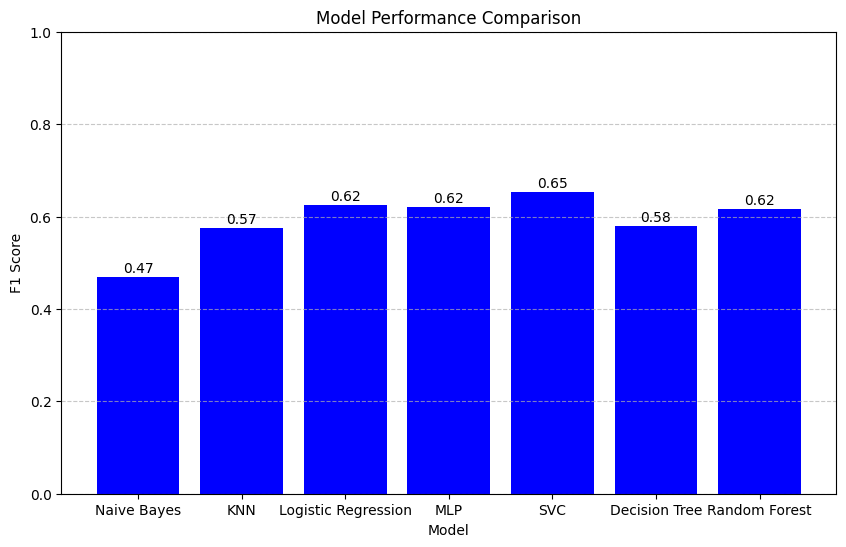

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Extract model names and F1 scores
models = list(f1_scores.keys())
scores = list(f1_scores.values())

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, scores, color='blue')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('Model Performance Comparison')
plt.ylim(0, 1)  # Adjust the y-axis range if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the F1 scores on top of the bars
for i, score in enumerate(scores):
    plt.text(i, score + 0.01, f'{score:.2f}', ha='center')

# Show the plot
plt.show()

### 7. Προετοιμασία αρχείου για τη δεύτερη υποβολή στο kaggle

7.α. Χρησιμοποιήστε **ΜΟΝΟ** το μοντέλο σας με την καλύτερη επίδοση για να κάνετε προβλέψεις χρησιμοποιώντας το δοθέν σύνολο εκπαίδευσης (test set)

In [49]:
for name, model in best_model:
    if name =='SVC':
        best_model_pred = model.predict(x_dense_test1)
        break


7.β. Αποθηκεύστε τις προβλέψεις από το καλύτερο μοντέλο σας σε ένα csv αρχείο. To csv αρχείο θα πρέπει να είναι περιέχει 2 στήλες: η πρώτη στήλη να περιέχει την στήλη id του test set file και η δεύτερη στήλη τις αντίστοιχες προβλέψεις που έκανε το καλύτερα εκπαιδευμένο μοντέλο σας (βήμα 7α).

In [50]:
id_column = list(range(1, len(best_model_pred) + 1))
predictions_df7 = pd.DataFrame({'id': id_column , 'predictions': best_model_pred})

# Save the DataFrame to a CSV file
predictions_df7.to_csv('best_model_predictions7.csv', index=False)